## Correlation

Correlation and convolution are very much alike. The following figure from [Convolution | Wikipedia](https://en.wikipedia.org/wiki/Convolution) demonstrates what happens when we convolve two signals and how that can be contrasted to calculating the cross-correlation between them.

<img style="float: center;" src="../../figures/Comparison_convolution_correlation.svg">


### Auto-correlation

For this part of the tutorial, we will calculate the auto-correlation of a (random) signal. Let's start by creating the random signal and visualizing it.

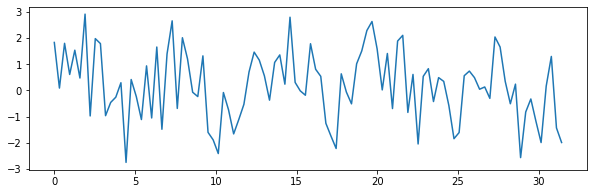

In [1]:
# Auto-correlation, step #1: create a signal
import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(0, 10*np.pi, 100)
Y = np.sin(X)
Y += 2*np.random.uniform(-1,1,len(X)) # Try to play with level of noise

plt.figure(figsize=(10,3))
plt.plot(X,Y);

Great! Now that we have a signal to play with, we will use the built-in _correlate_ function from the module NumPy to calculate the correlation of the signal Y with itself.

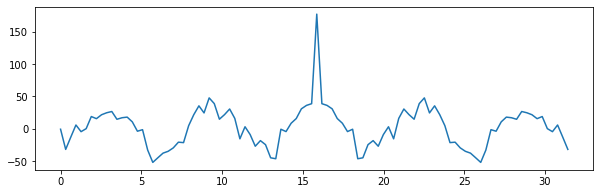

In [2]:
# Calculate auto-correlation of Y
C = np.correlate(Y, Y, mode='same')
plt.figure(figsize=(10,3))
plt.plot(X,C)

The above gives us some insightinto how the auto-correlation of a signal looks like. But to understand the algorithm in depth, let's make a new signal, one that is deterministic and much simpler.

[2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2.]


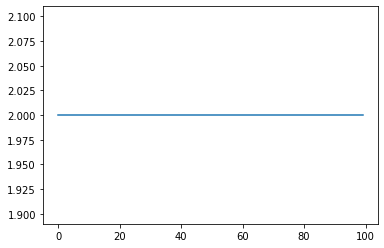

In [3]:
Y = 2*np.ones(100)
print(Y)
plt.plot(Y)
plt.show()

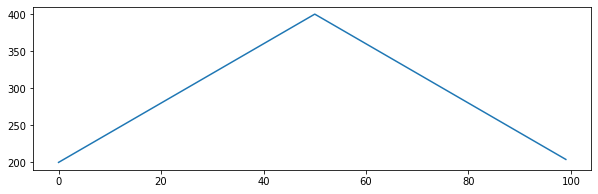

In [4]:
C = np.correlate(Y, Y, mode='same')

plt.figure(figsize=(10,3))
plt.plot(C)

This looks much better! What can you see? Is this what you expected to see?

### Fourier Transform

Next, we will see the Fourier Transform and some of its applications in signal processing.


#### Formal definition


The Fourier transform can be defined for signals which are

* discrete or continuous in time, and
* finite or infinite in duration.


This results in four cases. As you might expect, the frequency domain has the same cases:

* discrete or continuous in frequency, and
* finite or infinite in bandwidth.

When time is discrete, the frequency axis is finite, and vice versa. The four cases of the Fourier transform are listed below:

<img style="float: center;" src="https://www.dsprelated.com/josimages_new/sasp2/img88.png">

In all four cases, the Fourier transform can be interpreted as the inner product of the signal $ x$ with a complex sinusoid at radian frequency $ \omega$, denoted as $ s_\omega$. The sinusoid is appropriately adapted for each case:


<img style="float: center;" src="https://www.dsprelated.com/josimages_new/sasp2/img92.png">

#### Implementations

The DFT transforms N discrete-time samples to the same number of discrete frequency samples, and is defined as:

$$
X(k)=\sum_{n=0}^{N−1}x[n]e^{−i \frac{2 \pi n k}{N}}
$$

The discrete Fourier transform (DFT) is the primary transform used for numerical computation in digital signal processing. It is very widely used for spectrum analysis, fast convolution, and many other applications. It can be computed using the [fast Fourier transform (FFT) | Wikipedia](https://en.wikipedia.org/wiki/Fast_Fourier_transform) algorithm in a very efficient manner. You can also read more information about the implementation of the FFT on the [documentation page of scipy](https://docs.scipy.org/doc/scipy/reference/tutorial/fft.html#fast-fourier-transforms).

Let's go through some examples of the properties and applications of the FFT.

In [5]:
# Example 1: addition of multiple cosines of different frequencies and amplitudes

# importing fft libraries from scipy
from scipy.fft import fft,fftfreq

# initialization
fs = 500 # sampling frequency, Hz
dt = 1/fs # sampling interval, seconds
T = 1 # duration, seconds
tv = np.linspace(0,T,T*fs+1) # time vector

# cosine parameters
A = np.arange(1,6) # amplitudes
f = 10*np.arange(1,6) # frequencies

# creating the signals
y = np.zeros((len(f),len(tv)))
for ii in np.arange(0,5):
    y[ii] = A[ii]*np.cos(2*np.pi*f[ii]*tv)
    
y_sum = np.sum(y,axis=0)

# calculation of the FFT
N = 200 # number of FFT points (length of signal)
Y = fft(y_sum,N)
fv = fftfreq(N, dt)[:N//2] # make the frequency vector

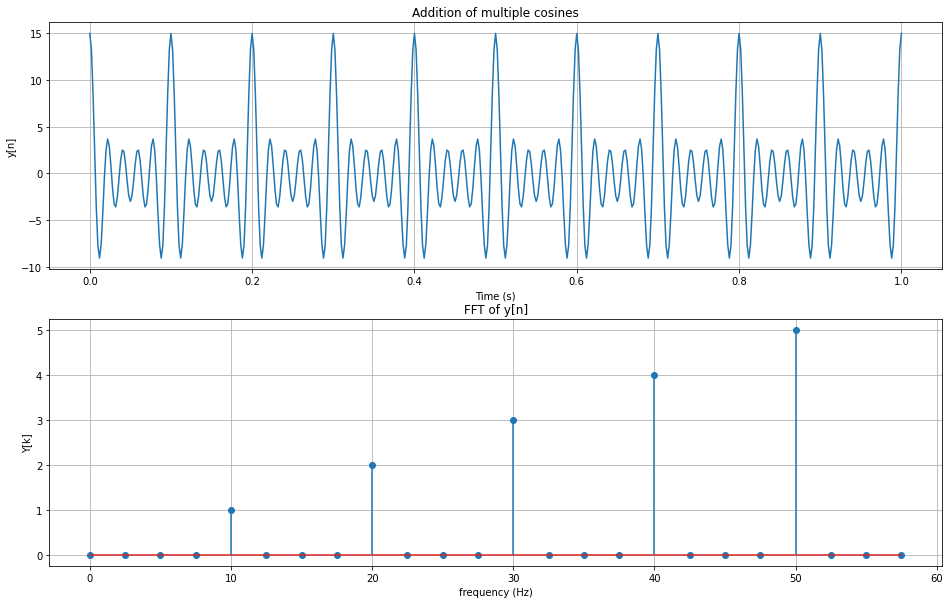

In [6]:
# Let's plot our results
plt.figure(figsize=(16,10))

plt.subplot(211)
plt.plot(tv,y_sum)
plt.title('Addition of multiple cosines')
plt.xlabel('Time (s)')
plt.ylabel('y[n]')
plt.grid()

plt.subplot(212)
plt.stem(fv[:24], 2.0/N * np.abs(Y[:24]))
plt.title('FFT of y[n]')
plt.xlabel('frequency (Hz)')
plt.ylabel('Y[k]')
plt.grid()

plt.show()

### Property \#1: Linearity

This property of the Fourier Transform states that:

$$
    \alpha x_1[n] + \beta x_2[n] \buildrel {DFT} \over \longleftrightarrow \alpha X_1[k] + \beta X_2[k]
$$

Let's see this in practice with an example:

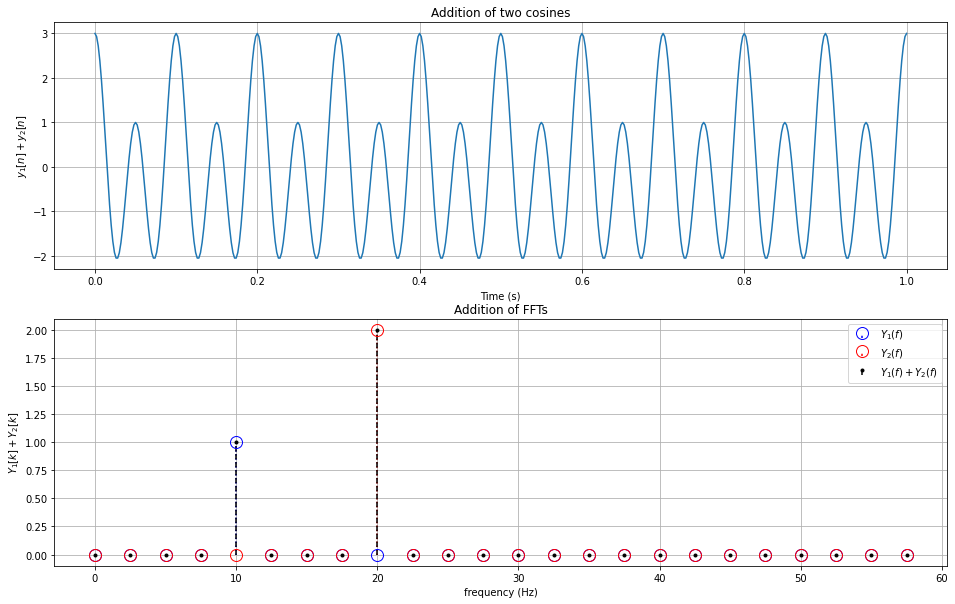

In [7]:
# Property: Linearity of the FFT

# calculation of the FFT for components 1:2
N = 200 # number of FFT points (length of signal)
Y1 = fft(y[0],N)
Y2 = fft(y[1],N)
fv = fftfreq(N, dt)[:N//2] # make the frequency vector

# Let's plot our results
# What do you expect to see?
plt.figure(figsize=(16,10))

plt.subplot(211)
plt.plot(tv,np.sum(y[0:2],axis=0))
plt.title('Addition of two cosines')
plt.xlabel('Time (s)')
plt.ylabel('$y_1[n]+y_2[n]$')
plt.grid()

plt.subplot(212)
(markerLines, _, baseLines) = plt.stem(fv[:24], 2.0/N * np.abs(Y1[:24]),linefmt='b:',markerfmt='bo',label='$Y_1(f)$')
plt.setp(markerLines, markerfacecolor='none', markeredgecolor='blue', markersize = 12)
plt.setp(baseLines,linestyle='none')

(markerLines, _, baseLines) = plt.stem(fv[:24], 2.0/N * np.abs(Y2[:24]),linefmt='r:',markerfmt='ro',label='$Y_2(f)$')
plt.setp(markerLines, markerfacecolor='none', markeredgecolor='red', markersize = 12)
plt.setp(baseLines,linestyle='none')

(markerLines, _, baseLines) = plt.stem(fv[:24], 2.0/N * np.abs(Y1[:24]+Y2[:24]),linefmt='k--',markerfmt='k.',label='$Y_1(f)+Y_2(f)$')
plt.setp(baseLines,linestyle='none')

plt.title('Addition of FFTs')
plt.xlabel('frequency (Hz)')
plt.ylabel('$Y_1[k] + Y_2[k]$')
plt.grid()
plt.legend()

plt.show()

### Property \#2: Convolution in time domain

This property of the Fourier Transform states that convolution in the time domain is equal to multiplication in the frequency domain:

$$
    f[n]*g[n] \buildrel {DFT} \over \longleftrightarrow F[k]G[k]
$$

Similarly, convolution in the frequency domain is equivalent to multiplication in the time domain.

$$
    F[k]*G[k] \buildrel {iDFT} \over \longleftrightarrow f[n]g[n]
$$

Let's see this in practice with an example:

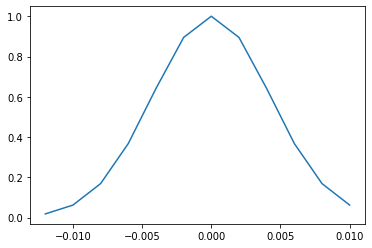

In [8]:
# Duration of the time window over which to smooth the signal
twin = 0.025
trange = int(twin*fs)

# Standard deviation of the gaussian
sigma = trange/4

# Actual temporal window over which to compute the Gaussian
window = np.arange(-trange//2,trange//2)

# Gaussian function over window and standard deviation sigma
gaussian = np.exp(-(window/sigma)**2)

# Plot the Gaussian 
plt.plot(window/fs, gaussian);

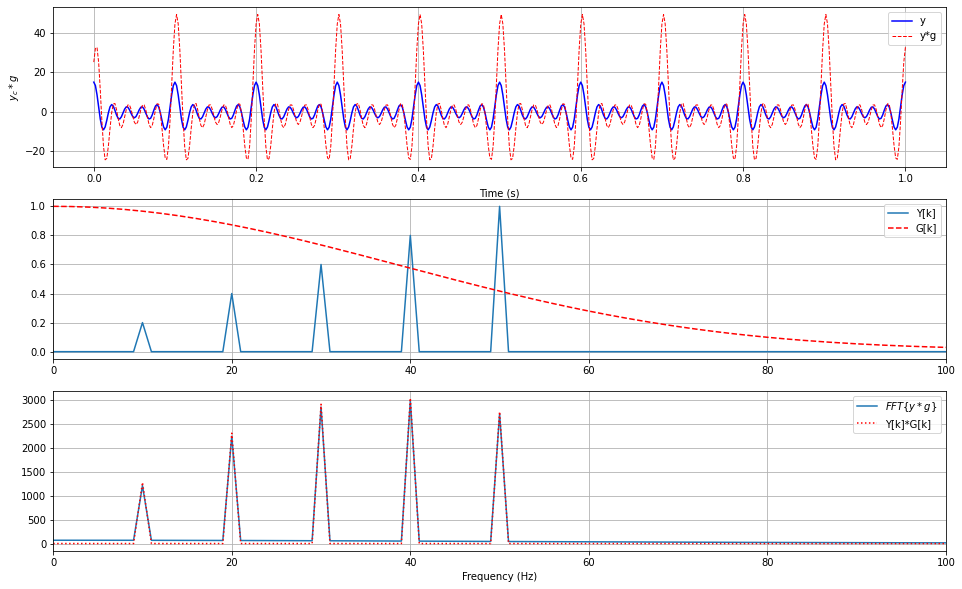

In [9]:
# Convolve the Gaussian window with the added sine waves
fr1 = np.convolve(y_sum, gaussian, mode='same')
N=500
fv = fftfreq(N, dt)[:N//2] # make the frequency vector

# Calculate the FFT of the complex convolved result
FR1 = fft(fr1,N)

# Calculate the FFT of the complete y signal
Y = fft(y_sum,N)

# Calculate the FFT of the Gaussian window
G = fft(gaussian,N)

# Plot the results
plt.figure(figsize=(16,10))
plt.subplot(311)
plt.plot(tv, y_sum, color='blue',label='y') # cosines
plt.plot(tv, fr1, color='red', linestyle='--', linewidth=1,label='y*g') # convolution result
plt.xlabel('Time (s)')
plt.ylabel('$y_{c} * g$')
plt.legend()
plt.grid()

plt.subplot(312)
plt.plot(fv, np.abs(Y[:N//2])/max(np.abs(Y)), label='Y[k]')
plt.plot(fv, np.abs(G[:N//2])/max(np.abs(G)), 'r--', label='G[k]')
plt.xlim([0,100])
plt.legend()
plt.grid()

plt.subplot(313)
plt.plot(fv, np.abs(FR1[:N//2]), label='$FFT\{y*g\}$')
plt.plot(fv, np.abs(G[:N//2]*Y[:N//2]), 'r:', label='Y[k]*G[k]')
plt.xlim([0,100])
plt.xlabel('Frequency (Hz)')
plt.legend()
plt.grid()


plt.show()

For more information on the properties of the DFT, you can look [here](https://cnx.org/contents/qAa9OhlP@2.44:AePPYjup@5/DFT-Definition-and-Properties)

### Example: Chirp signal

The following signal is increasing its frequency as time passes. Let's see what will happen if we calculate its FFT:

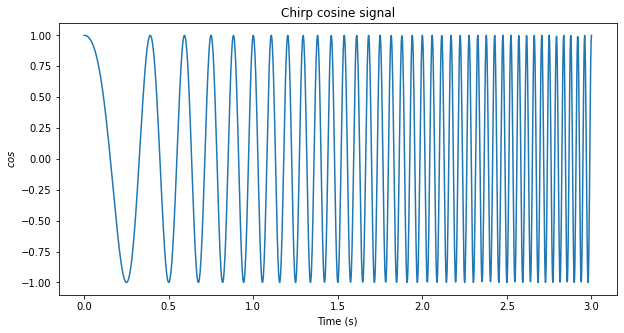

In [71]:
def mychirp(t,f0,t1,f1,phase=0):
    """
    Y = mychirp(t,f0,t1,f1) generates samples of a linear swept-frequency
    signal at the time instances defined in timebase array t.  The instantaneous
    frequency at time 0 is f0 Hertz.  The instantaneous frequency f1
    is achieved at time t1.
    The argument 'phase' is optional. It defines the initial phase of the
    signal degined in radians. By default phase=0 radian
    """
    t0 = t[0]
    T = t1-t0
    k = (f1-f0)/T
    x = np.cos(2*np.pi*(k/2*t+f0)*t+phase)
    return x

T2 = 3 # duration, seconds
fs2 = fs
dt2 = 1/fs2
tv2 = np.linspace(0,T2,T2*fs2+1)

# Seed the random number generator
np.random.seed(0)

# A chirp signal (frequency varies in time)
sin_chirp = np.sin(1/2*np.pi*tv2*(1+.1*tv2))
cos_chirp = mychirp(t=tv2,f0=1.,t1=.5,f1=5)

plt.figure(figsize=(10,5))
plt.plot(tv2, cos_chirp)
plt.xlabel('Time (s)')
plt.ylabel('$cos$')
plt.title('Chirp cosine signal')
plt.show()

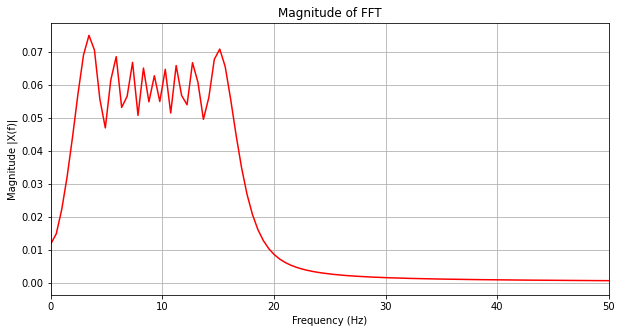

In [59]:
from scipy.fftpack import fftshift

# Calculate the FFT
L = len(sin_chirp)
NFFT = 1024
Y_chirp = fft(cos_chirp,NFFT)

fv2 = fftfreq(NFFT, dt2)[:NFFT//2] # make the frequency vector

plt.figure(figsize=(10,5))
plt.plot(fv2,abs(Y_chirp[:NFFT//2])/(L),'r')
plt.title('Magnitude of FFT')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude |X(f)|')
plt.xlim([0, 50])
plt.grid()
plt.show()

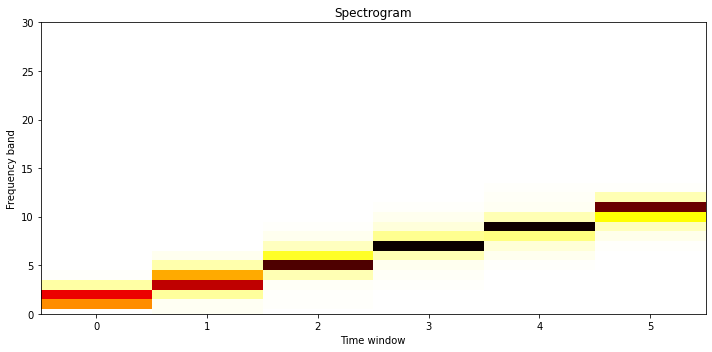

In [61]:
# spectrogram calculation using scipy.signal.spectrogram
from scipy.signal import spectrogram

freqs, times, spectrogram = spectrogram(cos_chirp)

plt.figure(figsize=(10, 5))
plt.imshow(spectrogram, aspect='auto', cmap='hot_r', origin='lower')
plt.title('Spectrogram')
plt.ylabel('Frequency band')
plt.xlabel('Time window')
plt.ylim((0,30))
plt.tight_layout()
plt.show()

A more commonly used estimate of a signal's power per frequency is the power spectral density (or simply power spectrum), which applies to signals existing over all time, or over a time period large enough (especially in relation to the duration of a measurement) that it could as well have been over an infinite time interval. The power spectral density (PSD) then refers to the spectral energy distribution that would be found per unit time, since the total energy of such a signal over all time would generally be infinite.

This description comes from the [Spectral Density | Wikipedia](https://en.wikipedia.org/wiki/Spectral_density) website. You can read more there. For now, let's calculate the PSD of the chirp signal.

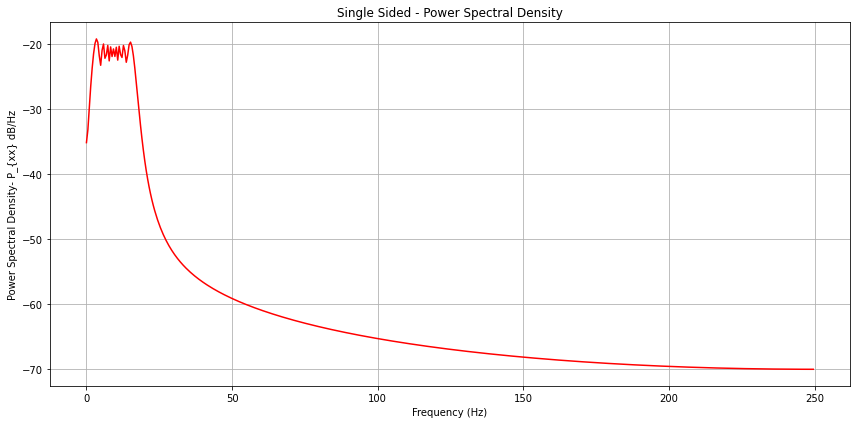

In [69]:
# Calculate the PSD
L = len(sin_chirp);
NFFT = 1024;
Y_chirp = fft(cos_chirp,NFFT);
Y_chirp_ss = Y_chirp[:NFFT//2]; # Throw away all samples past NFFT/2 for single sided plot
psd = Y_chirp_ss*np.conj(Y_chirp_ss)/(NFFT**2);
fv = fs*(np.arange(0,NFFT/2))/NFFT; # Single-sided frequency Vector

plt.figure(figsize=(12,6))
plt.plot(fv,10*np.log10(np.real(psd)),'r');
plt.title('Single Sided - Power Spectral Density');
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density- P_{xx} dB/Hz');
plt.grid()
plt.tight_layout()
plt.show()

While the Fourier transform The problem with the above stems from the varying frequency in the original signal. One of the assumptions of the FFT is that the signal is **stationary** (i.e. the statistical properties such as mean, variance, etc., remain the same over time). In the literature, a common term to refer to signals with stationary mean and variance is _wide-sense stationary_ (**WSS**).

If you want to learn more, you can check [this video](https://www.youtube.com/watch?v=kDmumocrvck&list=PLn0OLiymPak3lrIErlYVnIc3pGTwgt_ml) by neuroscientist [Mike X. Cohen](http://mikexcohen.com/lectures.html).